## Narasimha Gundavarapu
## 4784512020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. The LASSO and Boosting for Regression

## a) Download the Communities and Crime data1 from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.

In [2]:
# https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas

df = pd.read_csv('../data/communities.csv', header=None, usecols = [i for i in range(5, 128)], na_values='?')
train_data = df[:1495]
test_data = df[1495:]
train_data

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,NaN,NaN,NaN,NaN,0.00,NaN,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,NaN,NaN,NaN,NaN,0.00,NaN,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


##  (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [3]:
# https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/

for i in range(5,df.shape[1]):
    n_miss = df[[i]].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 0 (0.0%)
> 19, Missing: 0 (0.0%)
> 20, Missing: 0 (0.0%)
> 21, Missing: 0 (0.0%)
> 22, Missing: 0 (0.0%)
> 23, Missing: 0 (0.0%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 0 (0.0%)
> 26, Missing: 0 (0.0%)
> 27, Missing: 0 (0.0%)
> 28, Missing: 0 (0.0%)
> 29, Missing: 0 (0.0%)
> 30, Missing: 1 (0.1%)
> 31, Missing: 0 (0.0%)
> 32, Missing: 0 (0.0%)
> 33, Missing: 0 (0.0%)
> 34, Missing: 0 (0.0%)
> 35, Missing: 0 (0.0%)
> 36, Missing: 0 (0.0%)
> 37, Missing: 0 (0.0%)
> 38, Missing: 0 (0.0%)
> 39, Missing: 0 (0.0%)
> 40, Missing: 0 (0.0%)
> 41, Missing: 0 (0.0%)
> 42, Missing: 0 (0.0%)
> 43, Missing: 0 (0.0%)
> 44, Missing: 0 (0.0%)
> 45, Missing: 0 (0.0%)
> 46, Missing: 0 (0.0

In [4]:
from sklearn.impute import SimpleImputer
from numpy import isnan
imputer = SimpleImputer(strategy='mean')
#train data
data = train_data.values
X, y_train = data[:,:122], data[:,122]
print('Missing: %d' % sum(isnan(X).flatten()))
imp = imputer.fit(X)
x_train = imputer.transform(X)
print('Missing: %d' % sum(isnan(x_train).flatten()))

#test data
data = test_data.values
X, y_test = data[:,:122], data[:,122]
print('Missing: %d' % sum(isnan(X).flatten()))
x_test = imp.transform(X)
print('Missing: %d' % sum(isnan(x_test).flatten()))

Missing: 27633
Missing: 0
Missing: 9218
Missing: 0


## (c) Plot a correlation matrix for the features in the data set.

<AxesSubplot:>

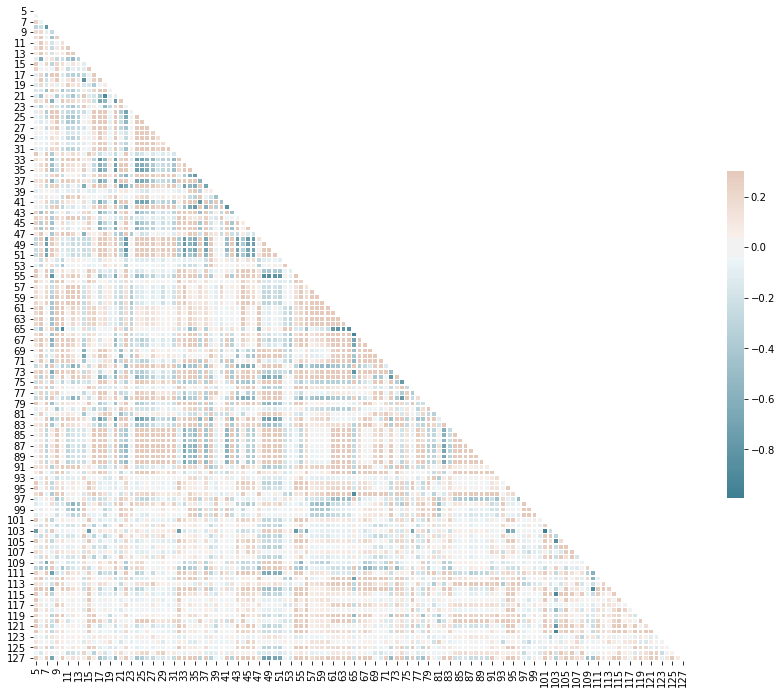

In [5]:
#https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(15, 12))

cmap = sns.diverging_palette(220, 30, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## (d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m , in which s is sample standard deviation and m is sample mean.

In [6]:
sd = df.std(axis=0)
mean = df.mean(axis=0)
CV = sd / mean
sorted_CV = CV.sort_values(ascending=False)
sorted_CV.values

array([4.40770244, 3.48548127, 2.99419645, 2.90049716, 2.555266  ,
       2.30496971, 2.20350254, 2.00174364, 1.98459895, 1.97937116,
       1.95877973, 1.82779033, 1.67803148, 1.65242636, 1.61427779,
       1.59040599, 1.4590666 , 1.4547666 , 1.41667266, 1.4109204 ,
       1.35916219, 1.31682154, 1.3001003 , 1.29763181, 1.28403377,
       1.28123297, 1.12719959, 1.0722913 , 1.07166861, 1.06474242,
       0.9790148 , 0.9213724 , 0.91980289, 0.91821097, 0.87874984,
       0.87473297, 0.87218694, 0.87063233, 0.84874387, 0.84788021,
       0.84436789, 0.81088779, 0.80968509, 0.76496024, 0.75710873,
       0.75398017, 0.74148102, 0.73543221, 0.73538726, 0.73453473,
       0.70003012, 0.6990305 , 0.68420109, 0.67560022, 0.67081289,
       0.63884887, 0.63318641, 0.62941494, 0.60619385, 0.589469  ,
       0.58701424, 0.58489027, 0.57975339, 0.57840084, 0.57380787,
       0.56188436, 0.5561328 , 0.55559247, 0.54563343, 0.52828627,
       0.52773189, 0.51058034, 0.50846131, 0.50755219, 0.50490

## (e) Pick [$\sqrt(128)$] features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

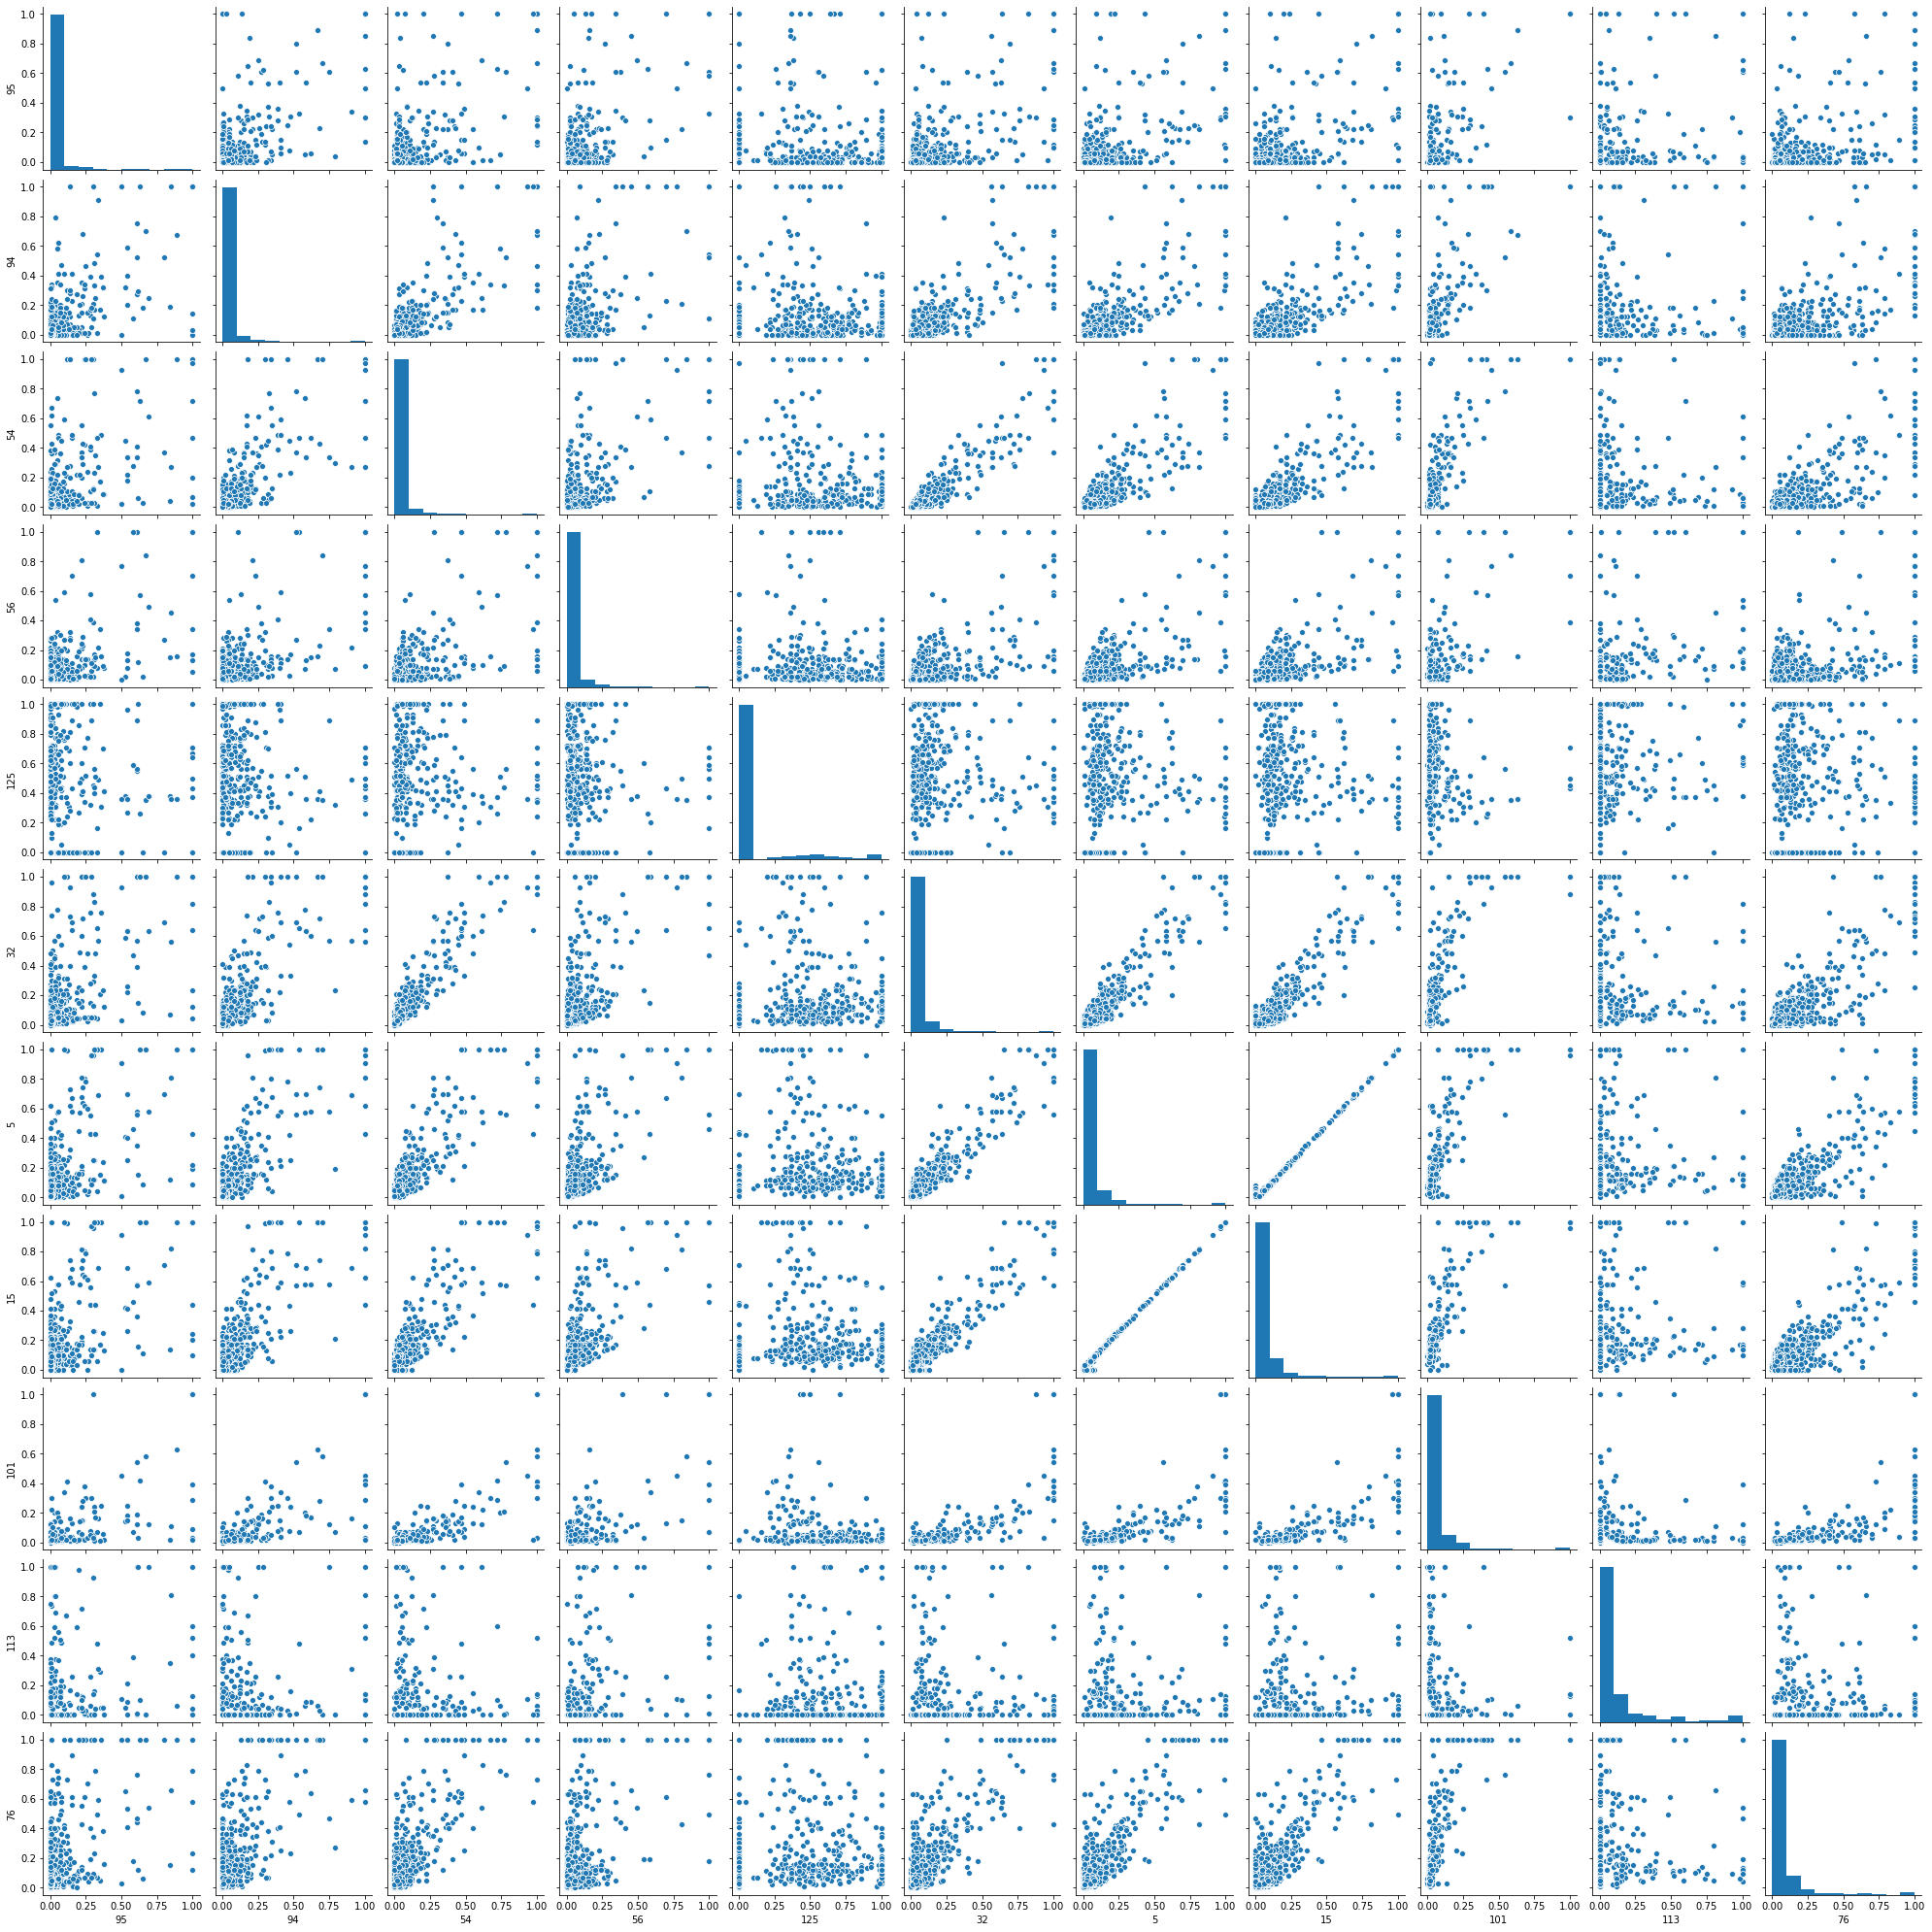

In [7]:
import math
indices = sorted_CV[:math.floor(math.sqrt(128))].index
sns.pairplot(df[indices])

<AxesSubplot:>

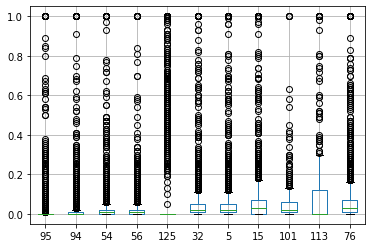

In [8]:
df[indices].boxplot()

From the above scatter matrix, we can observe that there is a very strong positive linear relationship between columns 5 and 15, and considerably strong linear relationship majority of other features. Although the box plot shows that there are many outliers, I think these features are significant in determining the label.

## (f) Fit a linear model using least squares to the training set and report the test error.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)
out = model.predict(x_test)
test_error = mean_squared_error(y_test, out)
print("The test error is : ", test_error)

The test error is :  0.01814197113553011


## (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [10]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [11]:
# https://machinelearningmastery.com/ridge-regression-with-python/

from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import RidgeCV

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

model.fit(x_train, y_train)

print("Best Lambda: %f" % model.alpha_)
print("Test error with Ridge: %f" % mean_squared_error(y_test, model.predict(x_test)))

/Users/narry/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.80529e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/narry/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.79193e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/narry/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.81646e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/narry/miniconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.80675e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Best Lambda: 0.990000
Test error with Ridge: 0.017734


## (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized2 features. Report the test error for both cases and compare them.

In [12]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

train_cols = np.arange(5,127, 1)
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
model = LassoCV(alphas=np.arange(0, 1, 0.01), cv=cv, n_jobs=-1)

model.fit(x_train, y_train)

variables = SelectFromModel(model, prefit=True)

selected_feat = train_data[train_cols].columns[(variables.get_support())]

print('Total features: {}'.format((train_data[train_cols].shape[1])))
print('Number of features selected: {}'.format(len(selected_feat)))
print("Best Lambda: %f" % model.alpha_)
print("Test error with Lasso: %f" % mean_squared_error(y_test, model.predict(x_test)))
# train_data[train_cols]

Total features: 122
Number of features selected: 122
Best Lambda: 0.000000
Test error with Lasso: 0.018124


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
model = LassoCV(alphas=np.arange(0, 1, 0.01), cv=cv, n_jobs=-1)

model.fit(X_train_scaled, y_train)

variables = SelectFromModel(model, prefit=True)

selected_feat = train_data[train_cols].columns[(variables.get_support())]

print('Total features: {}'.format((train_data[train_cols].shape[1])))
print('Number of features selected: {}'.format(len(selected_feat)))
print('Selected features: {}'.format(selected_feat.values))
print("Best Lambda: %f" % model.alpha_)
print("Test error with Lasso: %f" % mean_squared_error( y_test, model.predict(X_test_scaled)))

Total features: 122
Number of features selected: 14
Selected features: [ 7  8 16 43 49 53 55 73 76 77 79 91 95 96]
Best Lambda: 0.010000
Test error with Lasso: 0.017345


After standardizing the features, the test error improved from 0.018% to 0.017%. We can also observe that the lambda after scaling is 0.01 from 0 earlier and that implied here 14 features are selected, instead of all features.

## (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

Value of best M: 96


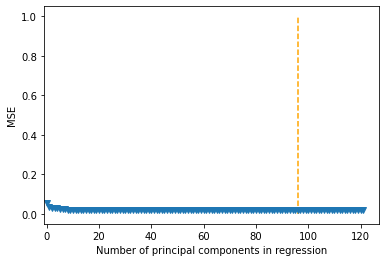

In [14]:
#http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html

from sklearn.decomposition import PCA
from sklearn import model_selection


n = len(X_train_scaled)

kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)
model = LinearRegression()
mse = []

score = -1*model_selection.cross_val_score(model, np.ones((n,1)), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 122):
    pca = PCA(n_components = i)
    X_train_reduced = pca.fit_transform(X_train_scaled)
    score = -1*model_selection.cross_val_score(model, X_train_reduced[:,:i], y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)


plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.xlim(xmin=-1)

best_no_of_comp = np.argmin(mse)

plt.vlines(best_no_of_comp, 0, 1, colors='orange', linestyles='dashed', label='no. of components ')
print("Value of best M: " + str(best_no_of_comp))

In [15]:
pca = PCA(n_components=best_no_of_comp)

X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.fit_transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_reduced, y_train)

print("Test error with PCR: %f" % mean_squared_error(y_test, model.predict(X_test_reduced)))

Test error with PCR: 0.030854


We can observe from above code that the test error with PCR with M = 96 is 0.03. M = 96 is barely fewer than 122, but from the following plot we can observe that at M = 42, we can capture 95% of variance in the model.

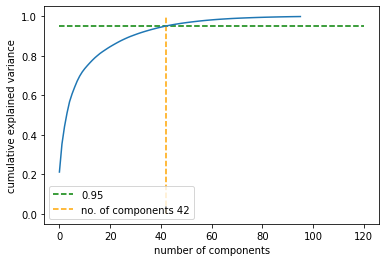

In [16]:
pca_fit = pca.fit(X_train_scaled)
f = np.cumsum(pca_fit.explained_variance_ratio_)
plt.plot(f)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.hlines(0.95, 0, 120, colors='green', linestyles='dashed', label='0.95')
idx = np.where(f>0.95)[0]
plt.vlines(idx[0], 0, 1, colors='orange', linestyles='dashed', label='no. of components ' + str(idx[0]))
plt.legend()

## (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost3 to fit the model tree. Determine α (the regularization term) using cross-validation.

In [17]:
# https://projector-video-pdf-converter.datacamp.com/3679/chapter3.pdf
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

X_train_boosted = xgb.DMatrix(X_train_scaled, label=y_train)
X_test_boosted = xgb.DMatrix(X_test_scaled, label=y_test)

booster = "gbtree"
objective = "reg:squarederror"
max_depth = 6
n_estimators = 100

model = xgb.XGBRegressor(n_estimators=n_estimators, objective=objective, booster=booster, max_depth=max_depth)

params = {'reg_alpha' : [0.00001, 0.0001, 0.001, 0.01, 0.1]}

grid_mse = GridSearchCV(estimator=model, param_grid=params, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_mse.fit(X_train_scaled, y_train)
print("Best Alpha: ",grid_mse.best_params_)

Best Alpha:  {'reg_alpha': 0.001}


# 2. Tree-Based Methods

## (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are nu- meric.

In [18]:
train_df = pd.read_csv('../data/aps_failure_training_set.csv', skiprows=20, na_values='na')
test_df = pd.read_csv('../data/aps_failure_test_set.csv', skiprows=20, na_values='na')

## (b) Data Preparation
## This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.
### i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

Source: https://machinelearningmastery.com/handle-missing-data-python/
1. We can remove the rows with missing data. But the question explicitly states that as the missing values are large, dicarding them is not a good idea.
2. We can apply data imputation, by replacing missing values with meaningful statistic such as 
  * mean, median, mode  
  * value that is distinct from others but essentially signifies null
  * value computed by other predictive model
  * value randomly selected from that column
  
I pick the mean statistic with Simple Imputer of sklearn

In [19]:
imputer = SimpleImputer(strategy='mean')
#train data
dtrain = train_df.values
X, y_train = dtrain[:,1:], dtrain[:,0]
print('----------TRAIN----------')
print('Missing: %d' % pd.isna(X).sum())
imp = imputer.fit(X)
x_train = imp.transform(X)
print('---------Impute----------')
print('Missing: %d' % pd.isna(x_train).sum())


#test data
print('----------TEST-----------')
dtest = test_df.values
X, y_test = dtest[:,1:], dtest[:,0]
print('Missing: %d' % pd.isna(X).sum())
x_test = imp.transform(X)
print('---------Impute----------')
print('Missing: %d' % pd.isna(x_train).sum())

----------TRAIN----------
Missing: 850015
---------Impute----------
Missing: 0
----------TEST-----------
Missing: 228680
---------Impute----------
Missing: 0


### ii. For each of the 170 features, calculate the coefficient of variation CV = s/m , where s is sample standard deviation and m is sample mean.

In [20]:
x = np.concatenate((x_train, x_test), axis =0 )
df2 = pd.DataFrame(x)

std2 = df2.std(axis=0)
mean2 = df2.mean(axis=0)
CV = std2 / mean2
sortedCV2 = CV.sort_values(ascending=False)
sortedCV2

91     194.438323
109    194.089168
3      193.955307
122    193.045035
138    120.084900
          ...    
75       0.461460
76       0.425256
77       0.398499
78       0.382003
89       0.000000
Length: 170, dtype: float64

### iii. Plot a correlation matrix for your features using pandas or any other tool.

<AxesSubplot:>

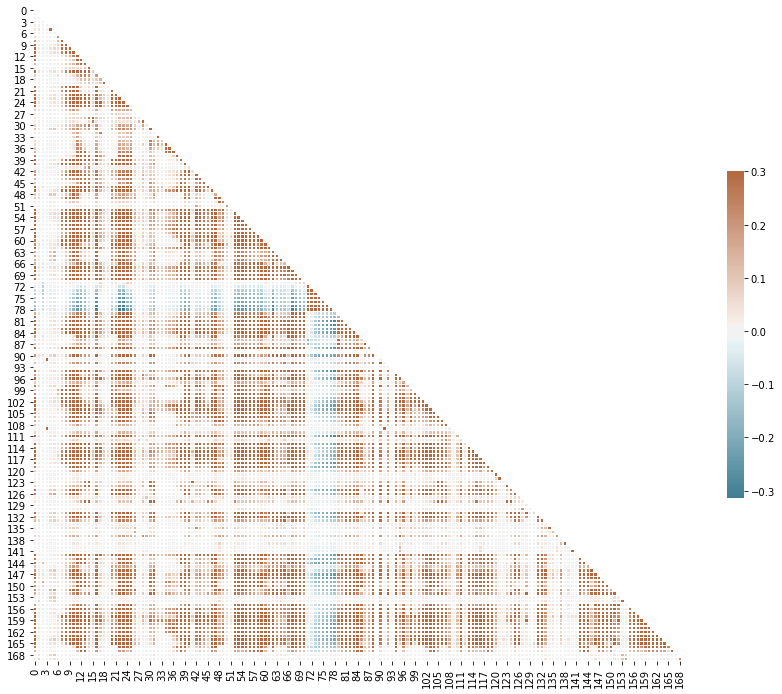

In [21]:

corr = df2.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(15, 12))

cmap = sns.diverging_palette(220, 30, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### iv. Pick  [$\sqrt170$] features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

Int64Index([91, 109, 3, 122, 138, 134, 27, 136, 6, 29, 19, 51, 41], dtype='int64')

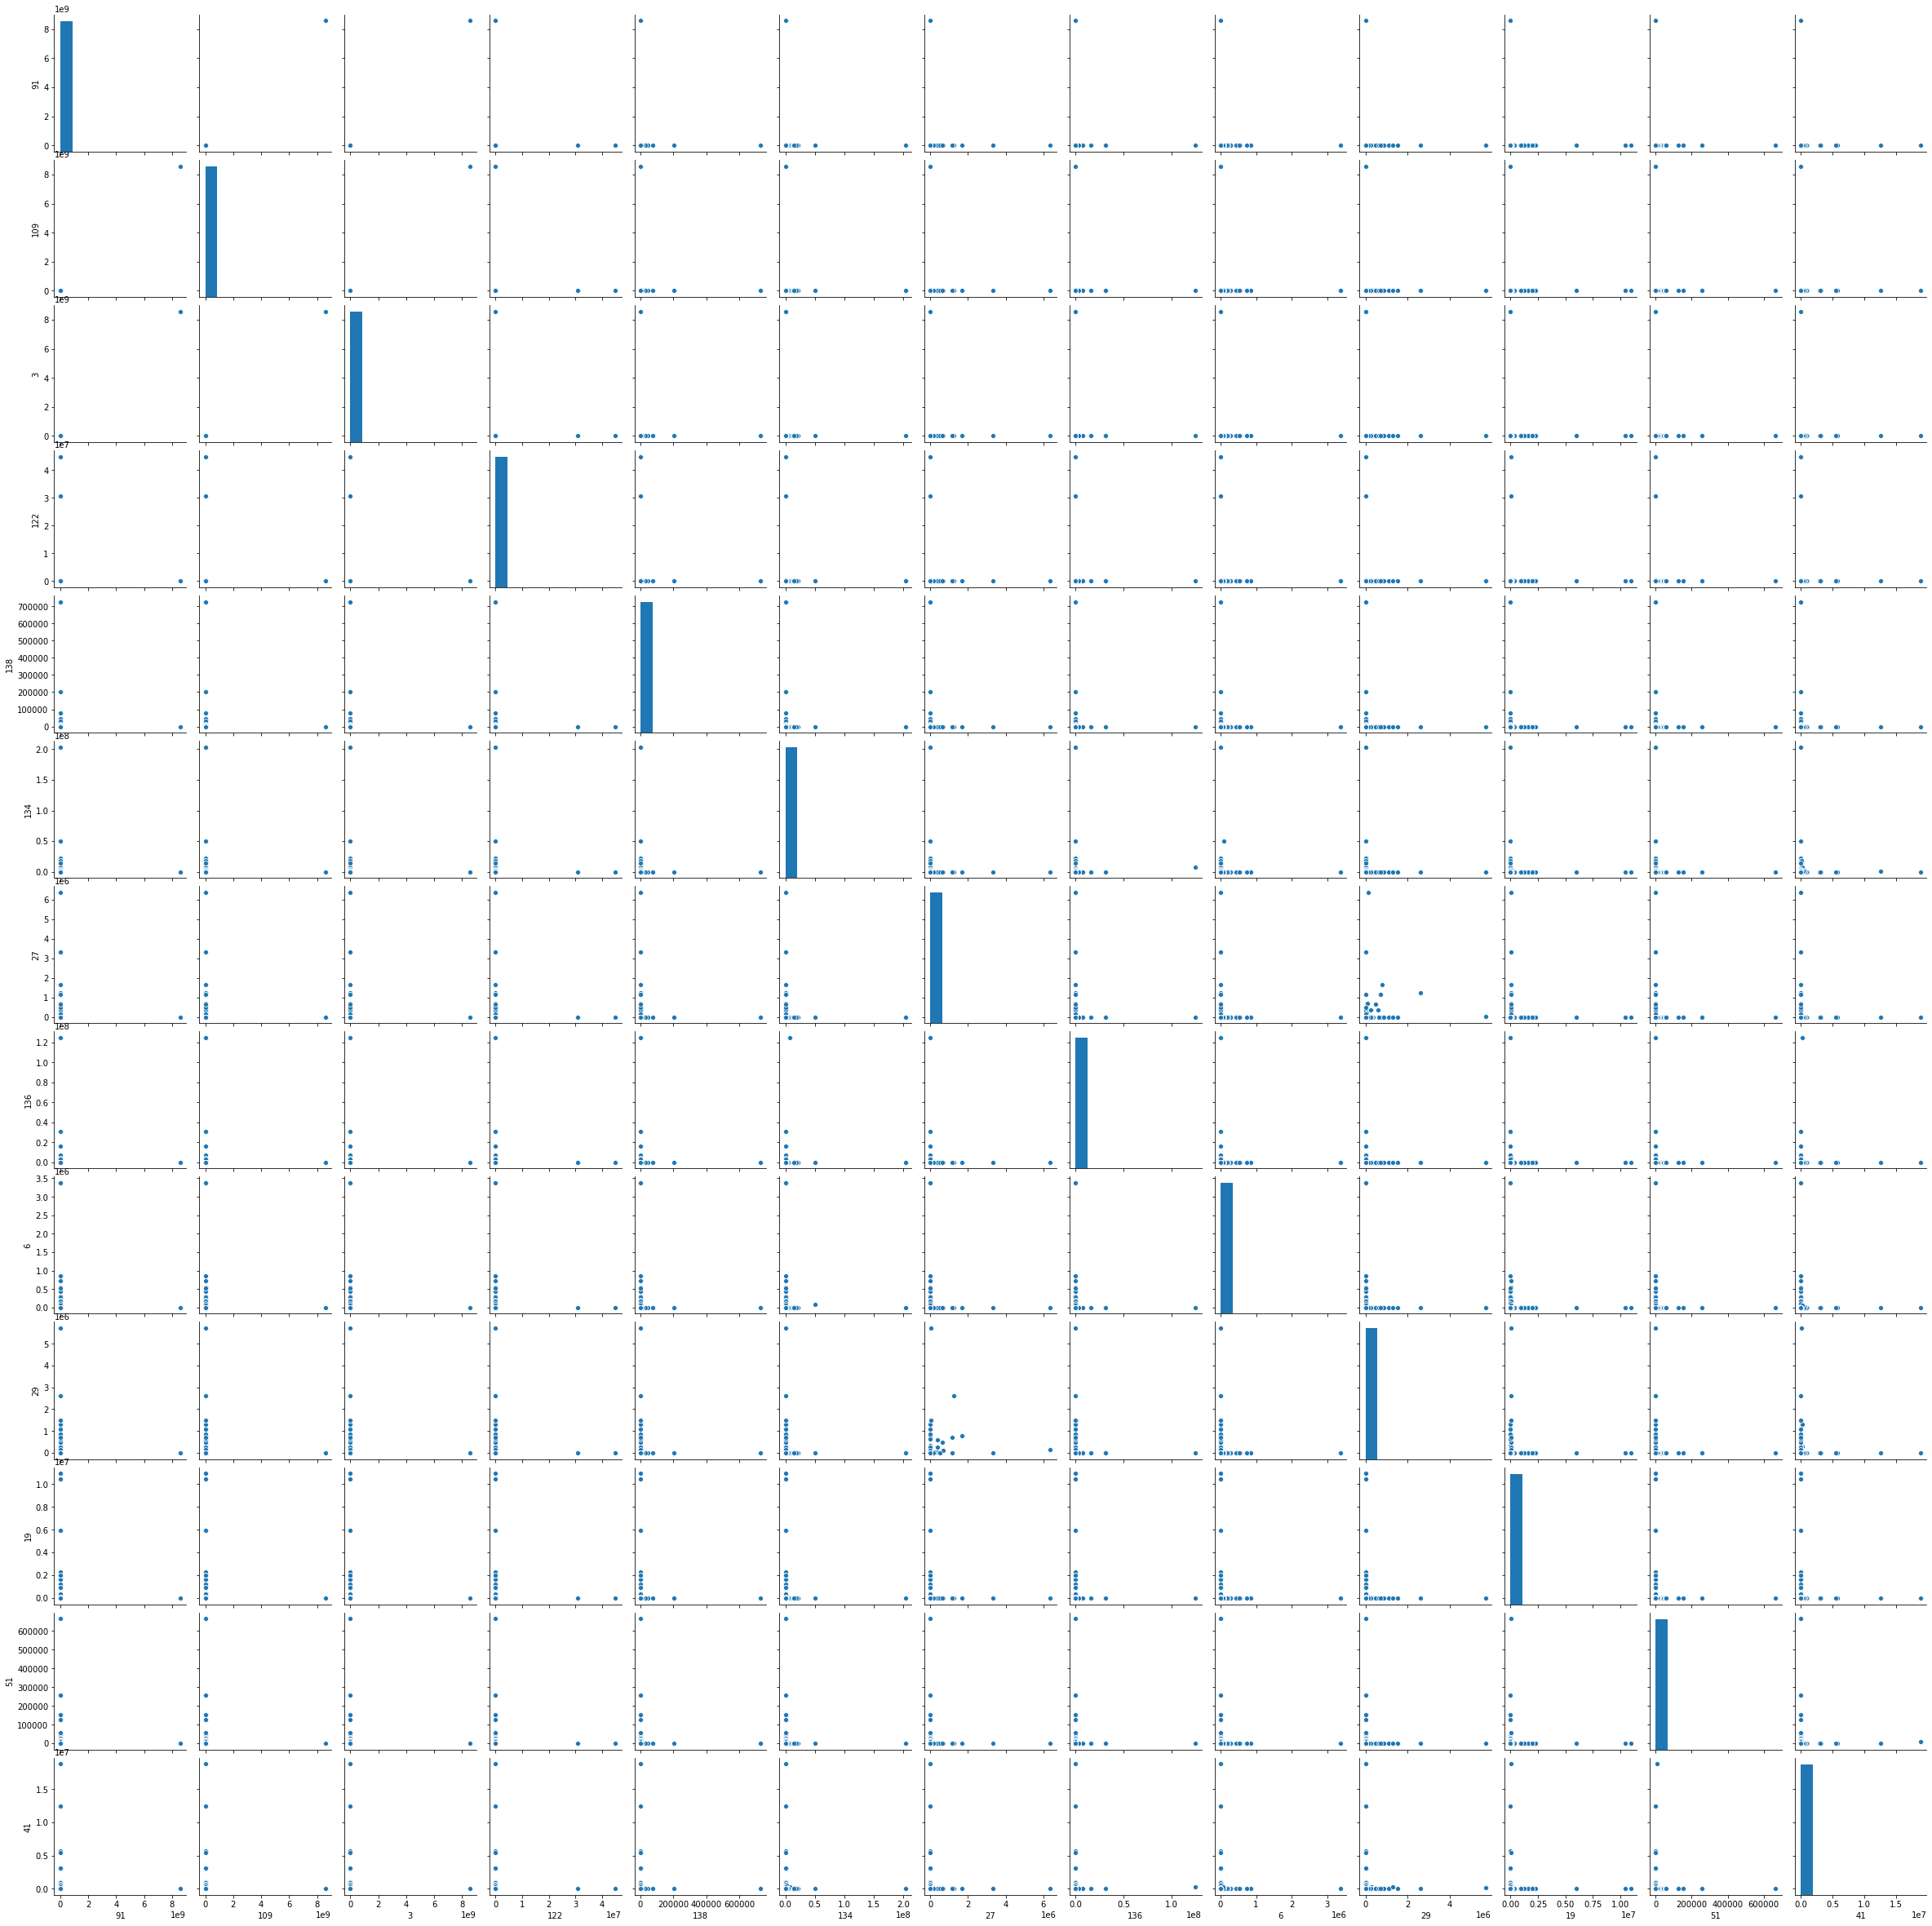

In [22]:
import math
sortedCV2
indices = sortedCV2[:math.floor(math.sqrt(170))].index
sns.pairplot(df2[indices])
indices

<AxesSubplot:>

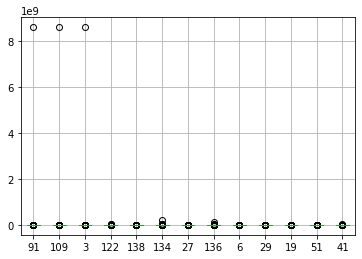

In [23]:
df2[indices].boxplot()

These plots are not descriptive enought to come to conclusion about significance of the features. We cannot determine using these alone.

### v. Determine the number of positive and negative data. Is this data set imbalanced?

In [24]:
Y = np.concatenate((y_train, y_test), axis=0)
p = np.where(Y == 'pos')
n = np.where(Y == 'neg')
print('Positive data %d' % p[0].size)
print('Negative data %d' % n[0].size)

Positive data 1375
Negative data 74625


Observing the results above, this set has a lot of negative data when compared to positive data. I'd call it imbalanced.

## (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [25]:
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

y_train_num = [1 if n == 'neg' else 0 for n in y_train]
y_test_num = [1 if n == 'neg' else 0 for n in y_test]

In [26]:
model = RandomForestClassifier(oob_score=True)
model.fit(x_train, y_train_num)
y_pred = model.predict(x_test)
fpr, tpr, th = roc_curve(y_test_num,y_pred)
area = auc(fpr, tpr)

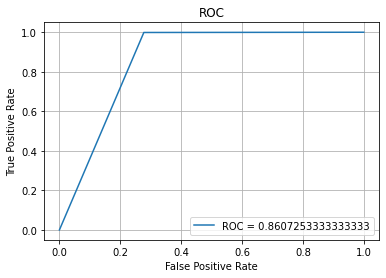

Out of Bag Error estimate: 0.005900
Test error with RF: 0.007687


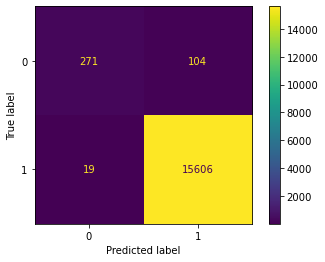

In [27]:
plt.plot(fpr, tpr, label='ROC = ' + str(area))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.grid()
plt.show()
plot_confusion_matrix(model, x_test, y_test_num)
oob_error = 1 - model.oob_score_
print("Out of Bag Error estimate: %f" % oob_error)
print("Test error with RF: %f" % mean_squared_error(y_test_num, y_pred))

## (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

Source : https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/

While there are multiple methods listed,  when using RandomForestClassifier a useful setting is class_weight=balanced wherein classes are automatically weighted inversely proportional to how frequently they appear in the data. 

$w_j = n/kn_j$
where $w_j$ is weight of class j, n is number of observations, $n_j$ is number of observations in class j and k is the number of classes.

In [28]:
model = RandomForestClassifier(oob_score=True, class_weight="balanced")
model.fit(x_train, y_train_num)
y_pred = model.predict(x_test)
fpr, tpr, th = roc_curve(y_test_num,y_pred)
area = auc(fpr, tpr)

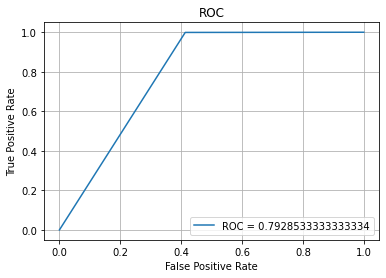

Out of Bag Error estimate: 0.007450
Test error with RF: 0.010625


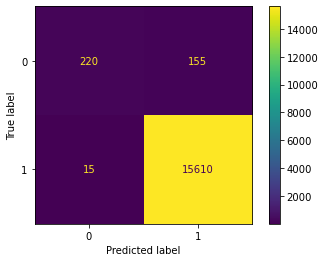

In [29]:
plt.plot(fpr, tpr, label='ROC = ' + str(area))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.grid()
plt.show()
plot_confusion_matrix(model, x_test, y_test_num)
oob_error = 1 - model.oob_score_
print("Out of Bag Error estimate: %f" % oob_error)
print("Test error with RF: %f" % mean_squared_error(y_test_num, y_pred))

While there is some improvement in the confusion matrix, this approach gives worse results when compared to the one above. Another technique for class imbalance is SMOTE.

## (e) Model Trees
### In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has 􏰀j βjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node. One of the methods that can be used at each node is Logistic Regression. One can use scikit learn to call Weka7 to train Logistic Model Trees for classification. Train Logistic Model Trees for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [30]:
import weka.core.jvm as jvm

from weka.classifiers import Classifier, Evaluation
from weka.core.dataset import create_instances_from_matrices, create_instances_from_lists
from weka.filters import Filter
import weka.core.converters as convert


jvm.start(max_heap_size="512m")

y_train_df = pd.DataFrame(y_train)
x_train_df = pd.DataFrame(x_train)

y_train_num = np.array([1 if n == 'neg' else 0 for n in y_train])
y_test_num = np.array([1 if n == 'neg' else 0 for n in y_test])

# data_df = pd.concat([y_train_df, x_train_df], axis=1)
# data_df.to_csv('./train_data.csv', sep=",", index=False)
# train_data = convert.load_any_file(filename='./train_data.csv')
# train_data.class_is_first()
train_data = create_instances_from_matrices(x_train, y_train_num, name="generated from matrix")
train_data.class_is_last()
filtered = Filter(classname='weka.filters.unsupervised.attribute.NumericToNominal')
filtered.inputformat(train_data)
train_data = filtered.filter(train_data)


DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/Users/narry/miniconda3/envs/ml/lib/python3.8/site-packages/javabridge/jars/rhino-1.7R4.jar', '/Users/narry/miniconda3/envs/ml/lib/python3.8/site-packages/javabridge/jars/runnablequeue.jar', '/Users/narry/miniconda3/envs/ml/lib/python3.8/site-packages/javabridge/jars/cpython.jar', '/Users/narry/miniconda3/envs/ml/lib/python3.8/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/narry/miniconda3/envs/ml/lib/python3.8/site-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [31]:
from weka.core.classes import Random
classifier = Classifier(classname="weka.classifiers.trees.LMT")
evaluation = Evaluation(train_data)
# evaluation.crossvalidate_model(classifier, train_data, 5, Random(1)) 
# print(evaluation.summary())

classifier.build_classifier(train_data)
y_predict = evaluation.test_model(classifier, train_data)


JavaException: Java heap space

## (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2333)
smote_train_fit = smote.fit_sample(x_train, y_train)

y_train_df = pd.DataFrame(y_train)
x_train_df = pd.DataFrame(x_train)

y_train_num = np.array([1 if n == 'neg' else 0 for n in y_train])
y_test_num = np.array([1 if n == 'neg' else 0 for n in y_test])

# data_df = pd.concat([y_train_df, x_train_df], axis=1)
# data_df.to_csv('./train_data.csv', sep=",", index=False)
# train_data = convert.load_any_file(filename='./train_data.csv')
# train_data.class_is_first()
train_data = create_instances_from_matrices(x_train, y_train_num, name="generated from matrix")
train_data.class_is_last()
filtered = Filter(classname='weka.filters.unsupervised.attribute.NumericToNominal')
filtered.inputformat(train_data)
train_data = filtered.filter(train_data)

In [ ]:
classifier = Classifier(classname="weka.classifiers.trees.LMT")
evaluation = Evaluation(train_data)
# evaluation.crossvalidate_model(classifier, train_data, 5, Random(1)) 
# print(evaluation.summary())

classifier.build_classifier(train_data)
y_predict = evaluation.test_model(classifier, train_data)

jvm.stop()

# 3. ISLR 6.8.3
### Suppose we estimate the regression coefficients in a linear regression model by minimizing $\sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p}\beta_jx_{ij})^2$ subject to $\sum_{j=1}^{p}\lvert \beta_j \rvert <= s$
### for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer

### (a) As we increase s from 0, the training RSS will:
#### i. Increase initially, and then eventually start decreasing in an inverted U shape.
#### ii. Decrease initially, and then eventually start increasing in a U shape.
#### iii. Steadily increase.
#### iv. Steadily decrease.
#### v. Remain constant.
A. iv. Increasing s will make model more flexible, so the training RSS will steadily decrease.

### (b) Repeat (a) for test RSS.
A. ii. Although it will decrease initially, it will be steady for a while and increase like a U.

### (c) Repeat (a) for variance.
A. iii. As discussed earlier, the model becomes flexibile which implies variance increases steadily.

### (d) Repeat (a) for (squared) bias.
A. iv. For flexible models, the bias decreases.

### (e) Repeat (a) for the irreducible error.
A. v. Whatever the change, it doesn't affect the irreducible error as it doesn't depend on the function at all.

# 4. ISLR, 6.8.5
### It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting.
### Suppose that n = 2, p = 2, x11 = x12, x21 = x22. Furthermore, supposethaty1+y2 =0andx11+x21 =0andx12+x22 =0,sothat the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: β0 = 0.

### (a) Write out the ridge regression optimization problem in this setting.
### (b) Argue that in this setting, the ridge coefficient estimates satisfy β1 = β2.
### (c) Write out the lasso optimization problem in this setting.
### (d) Argue that in this setting, the lasso coefficients β1 and β2 are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.

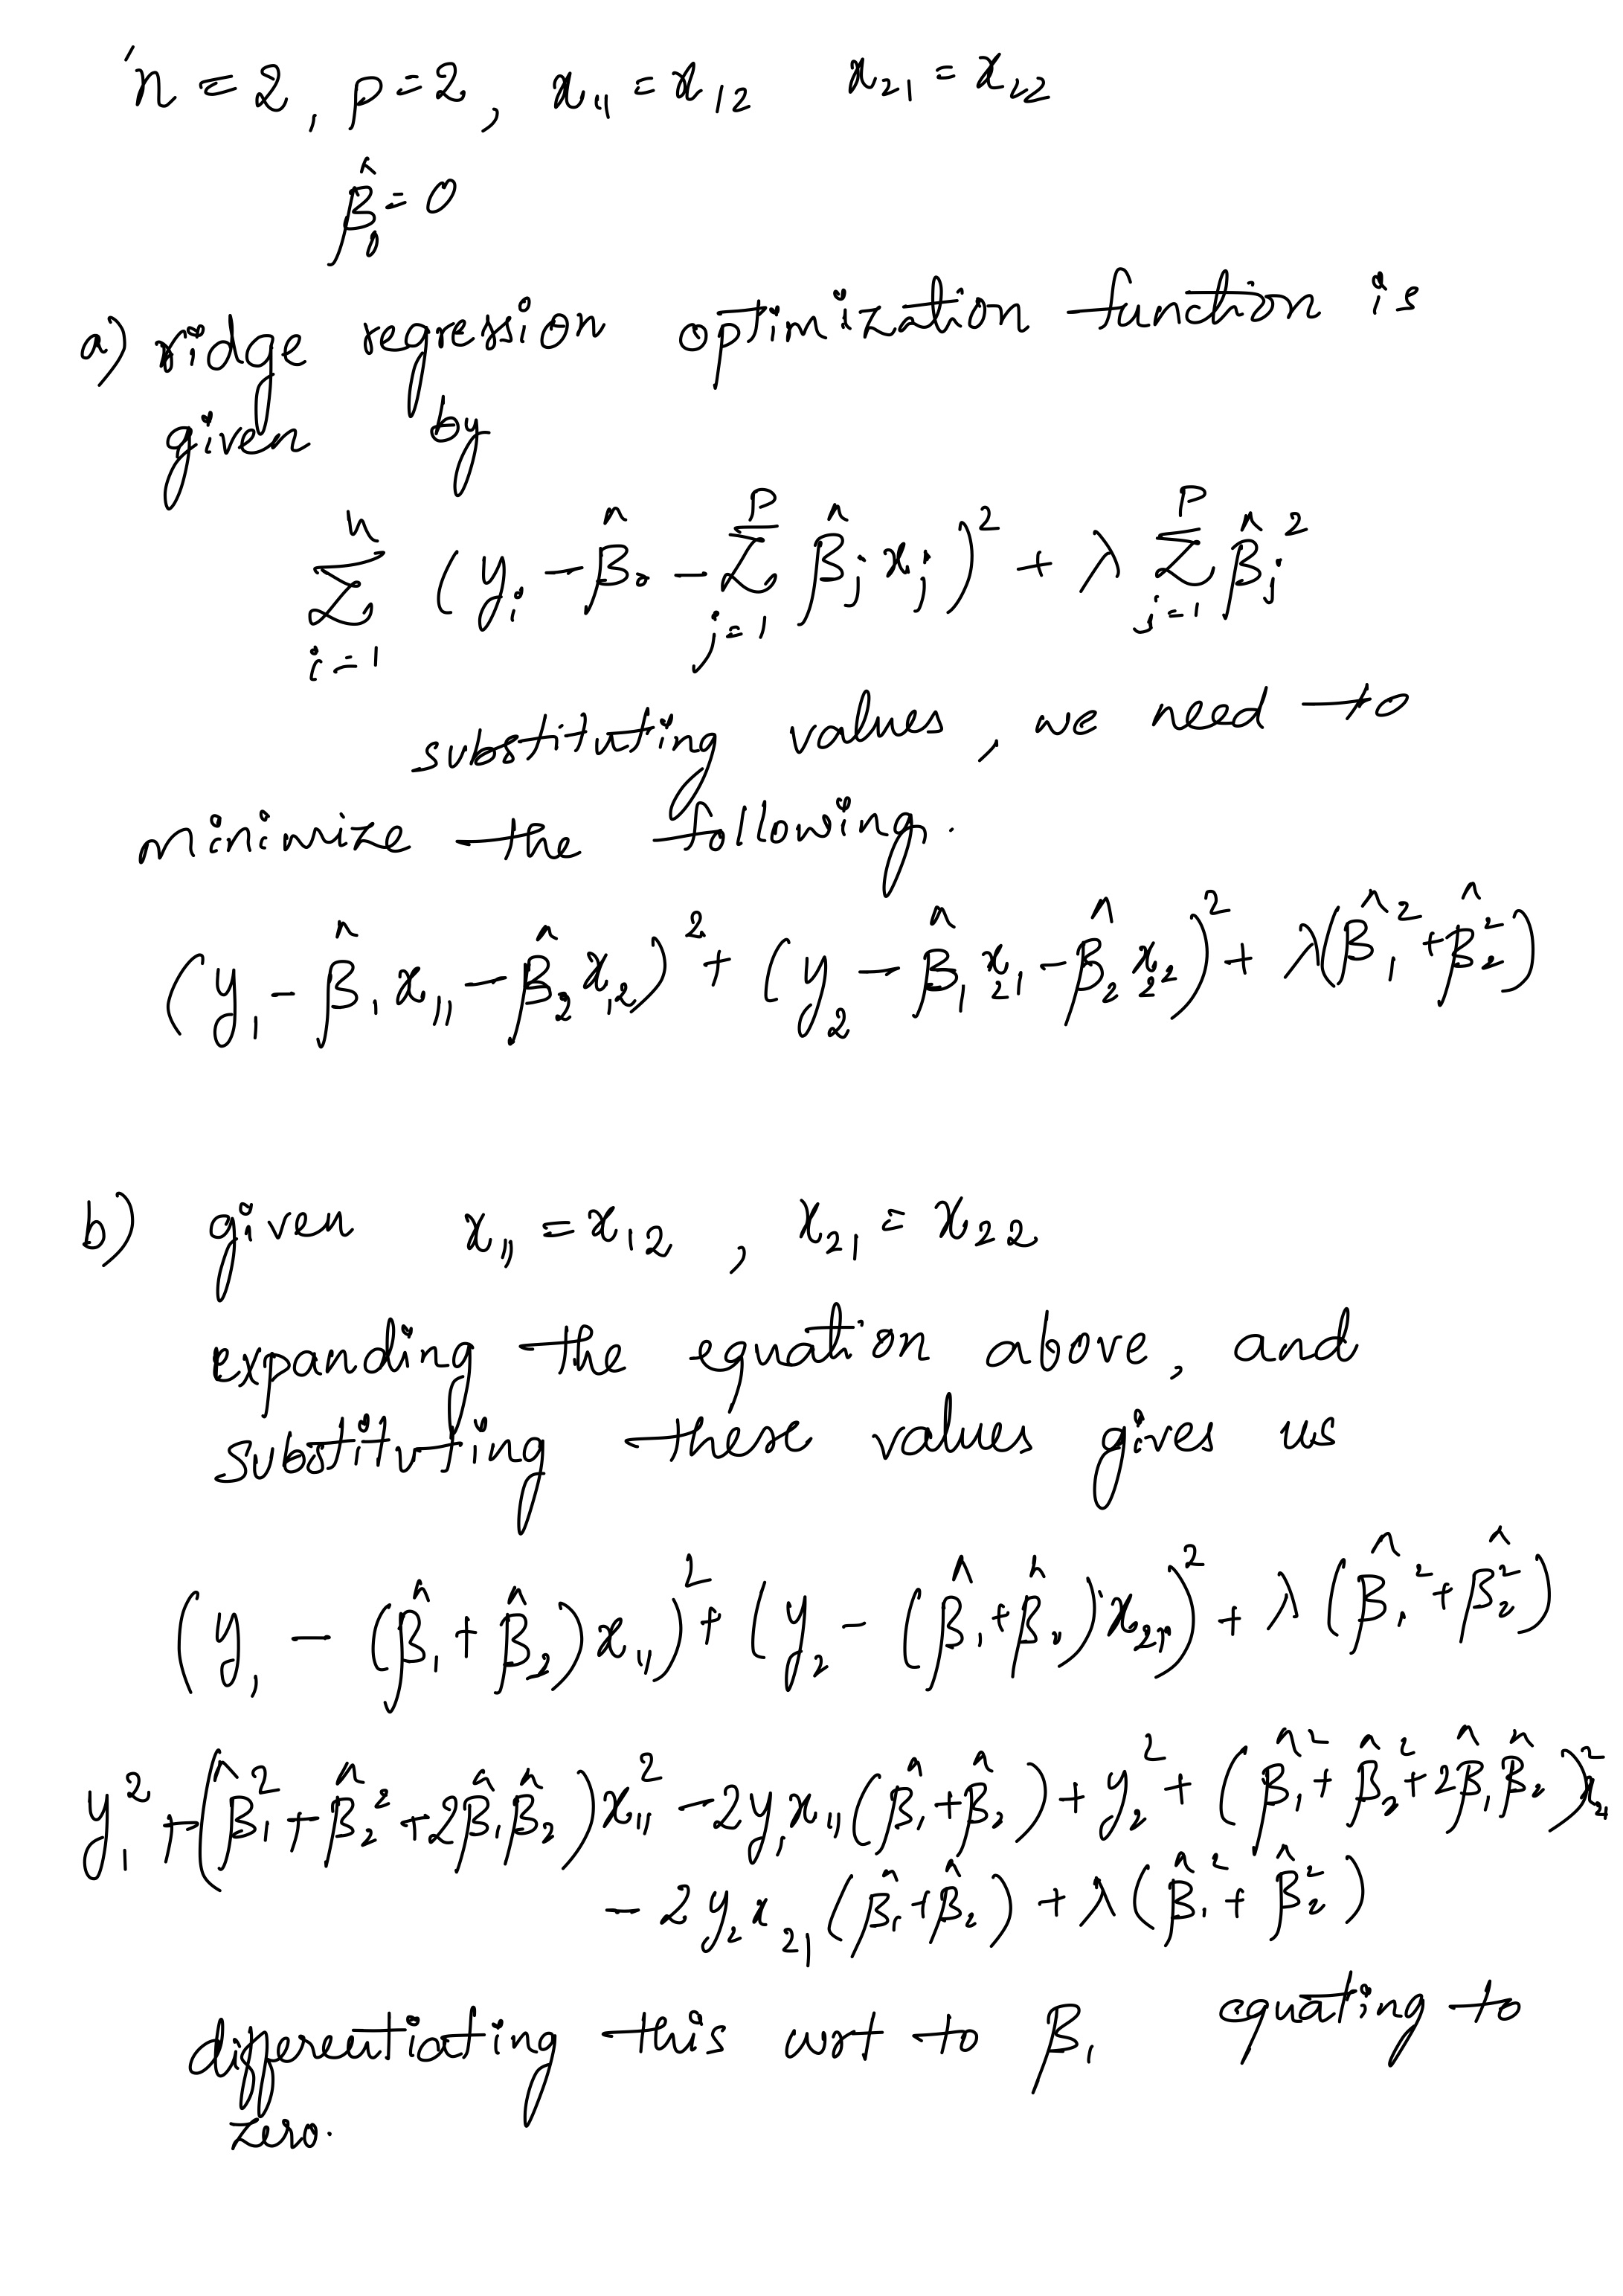

In [32]:
from IPython.display import Image
Image(filename='../ISLR685_1.jpg',width=800, height=400)

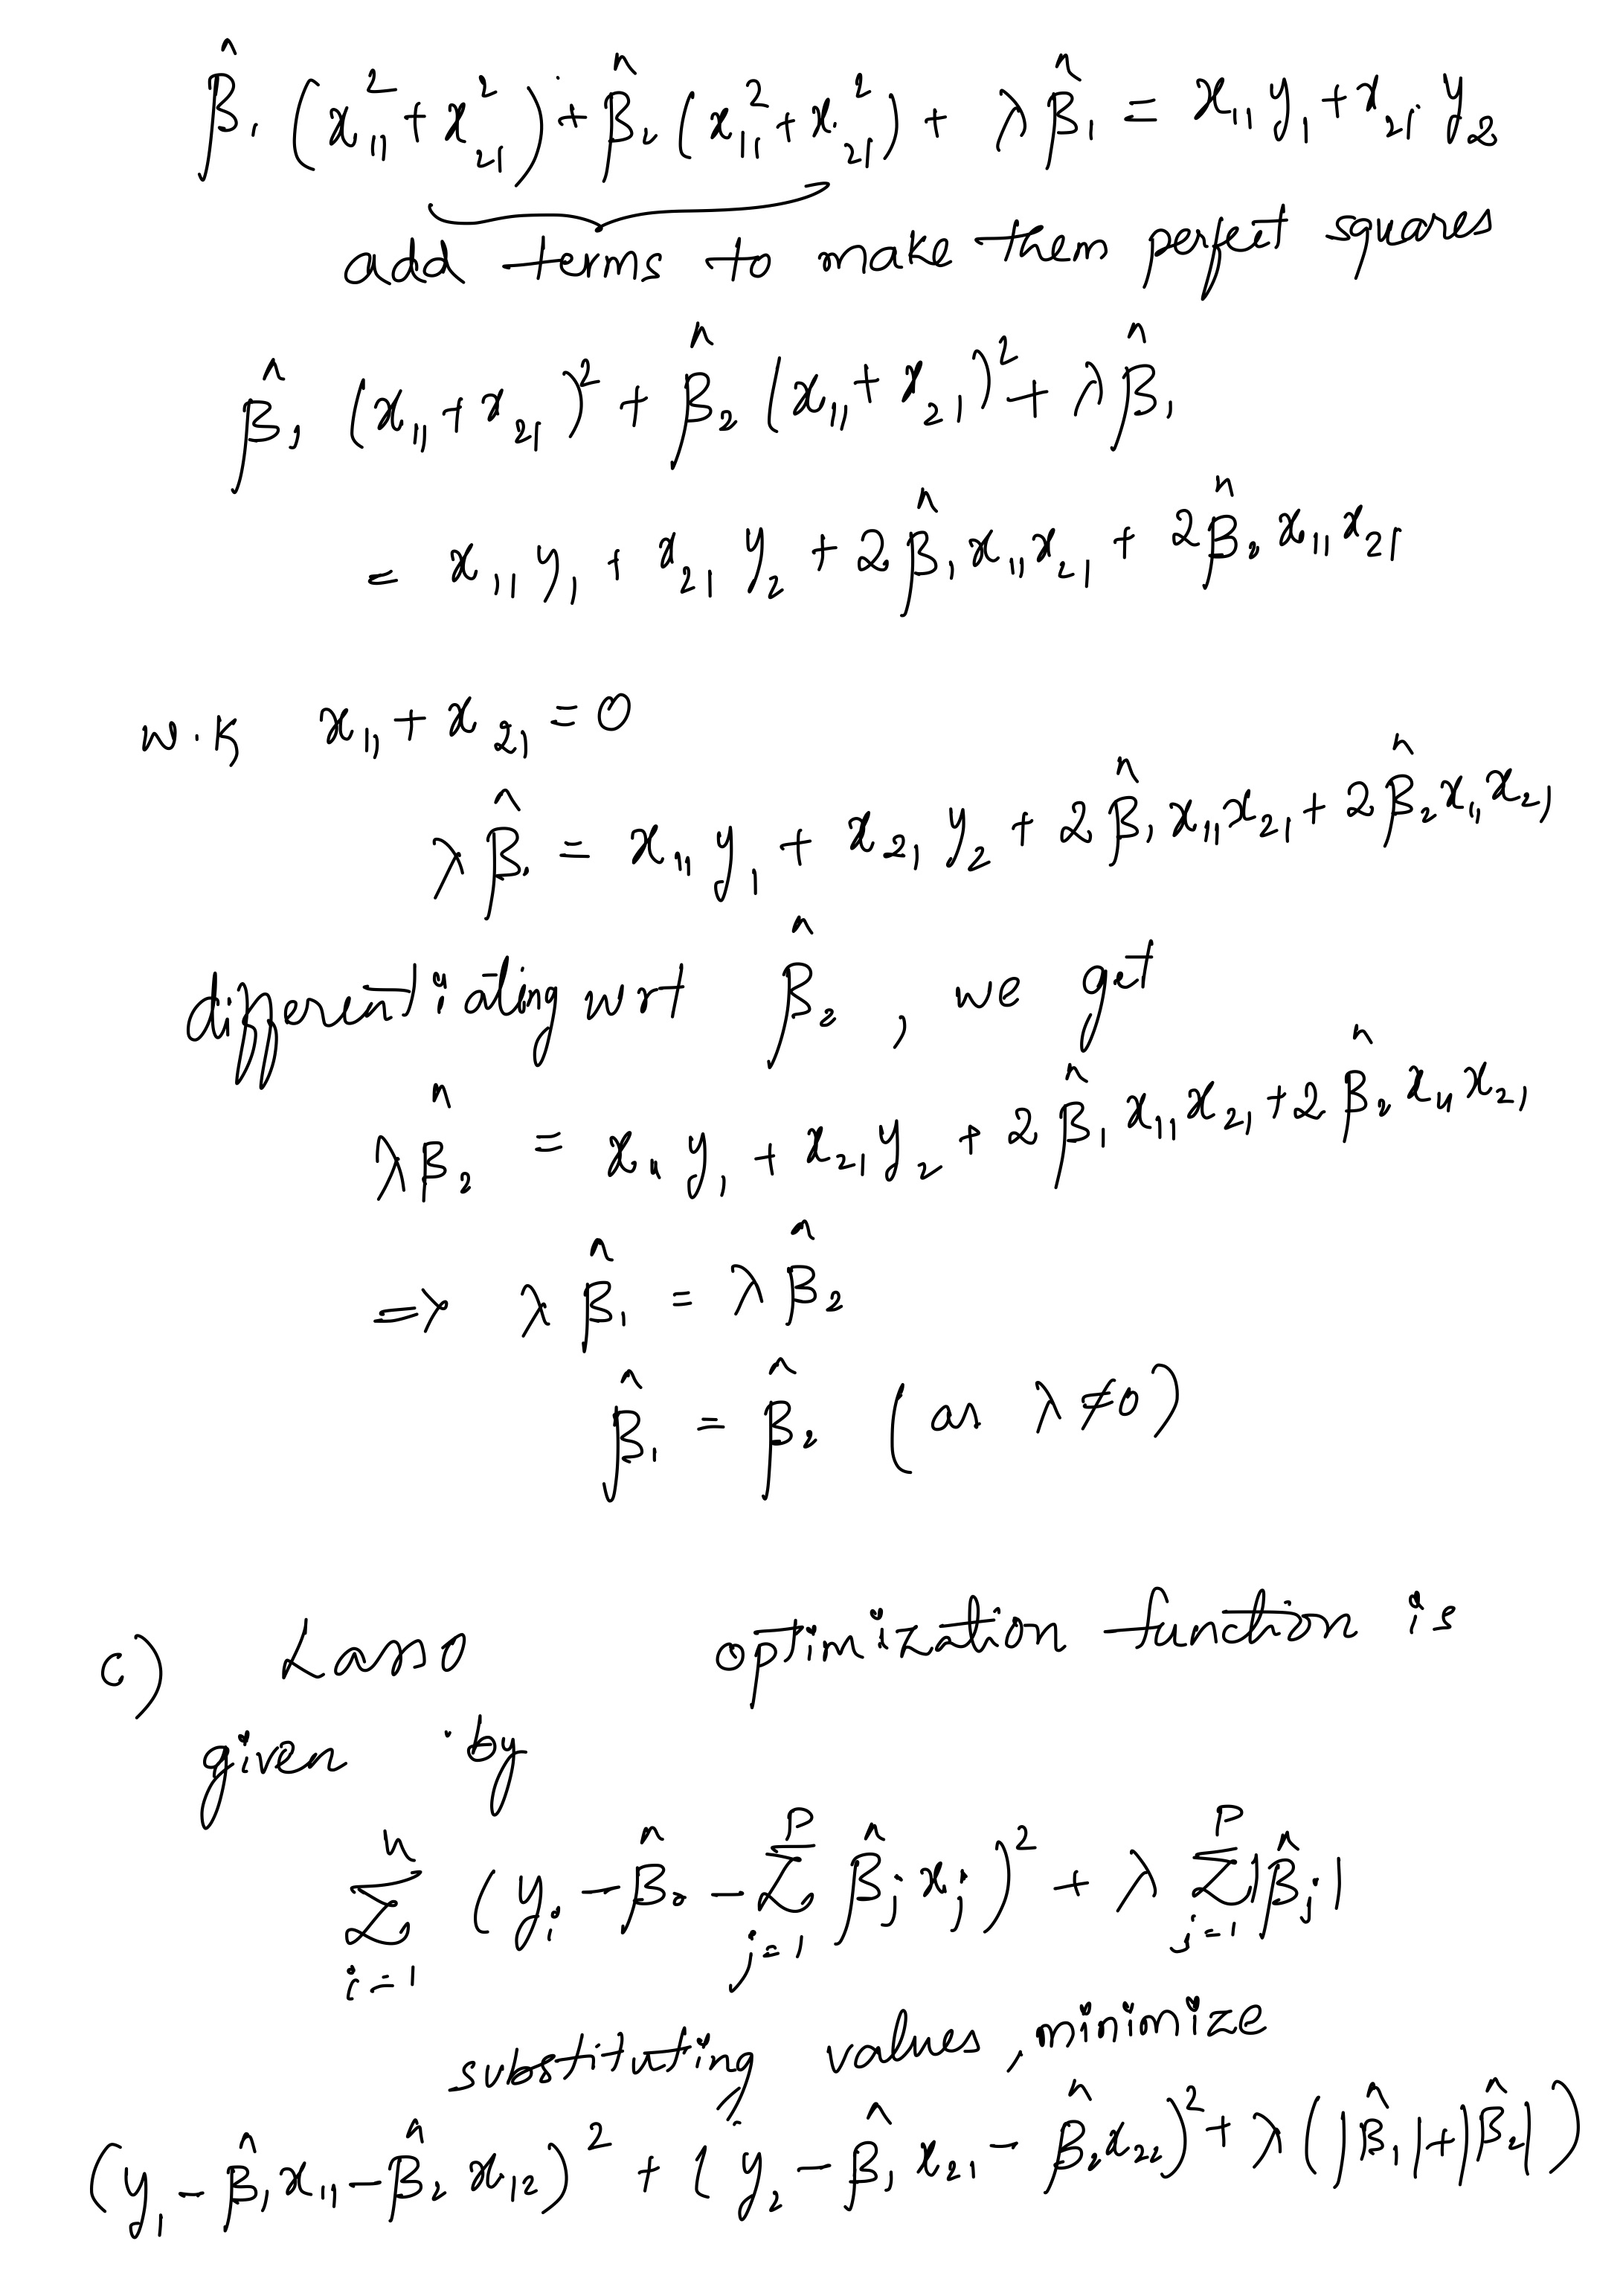

In [33]:
Image(filename='../ISLR685_2.jpg',width=800, height=400)

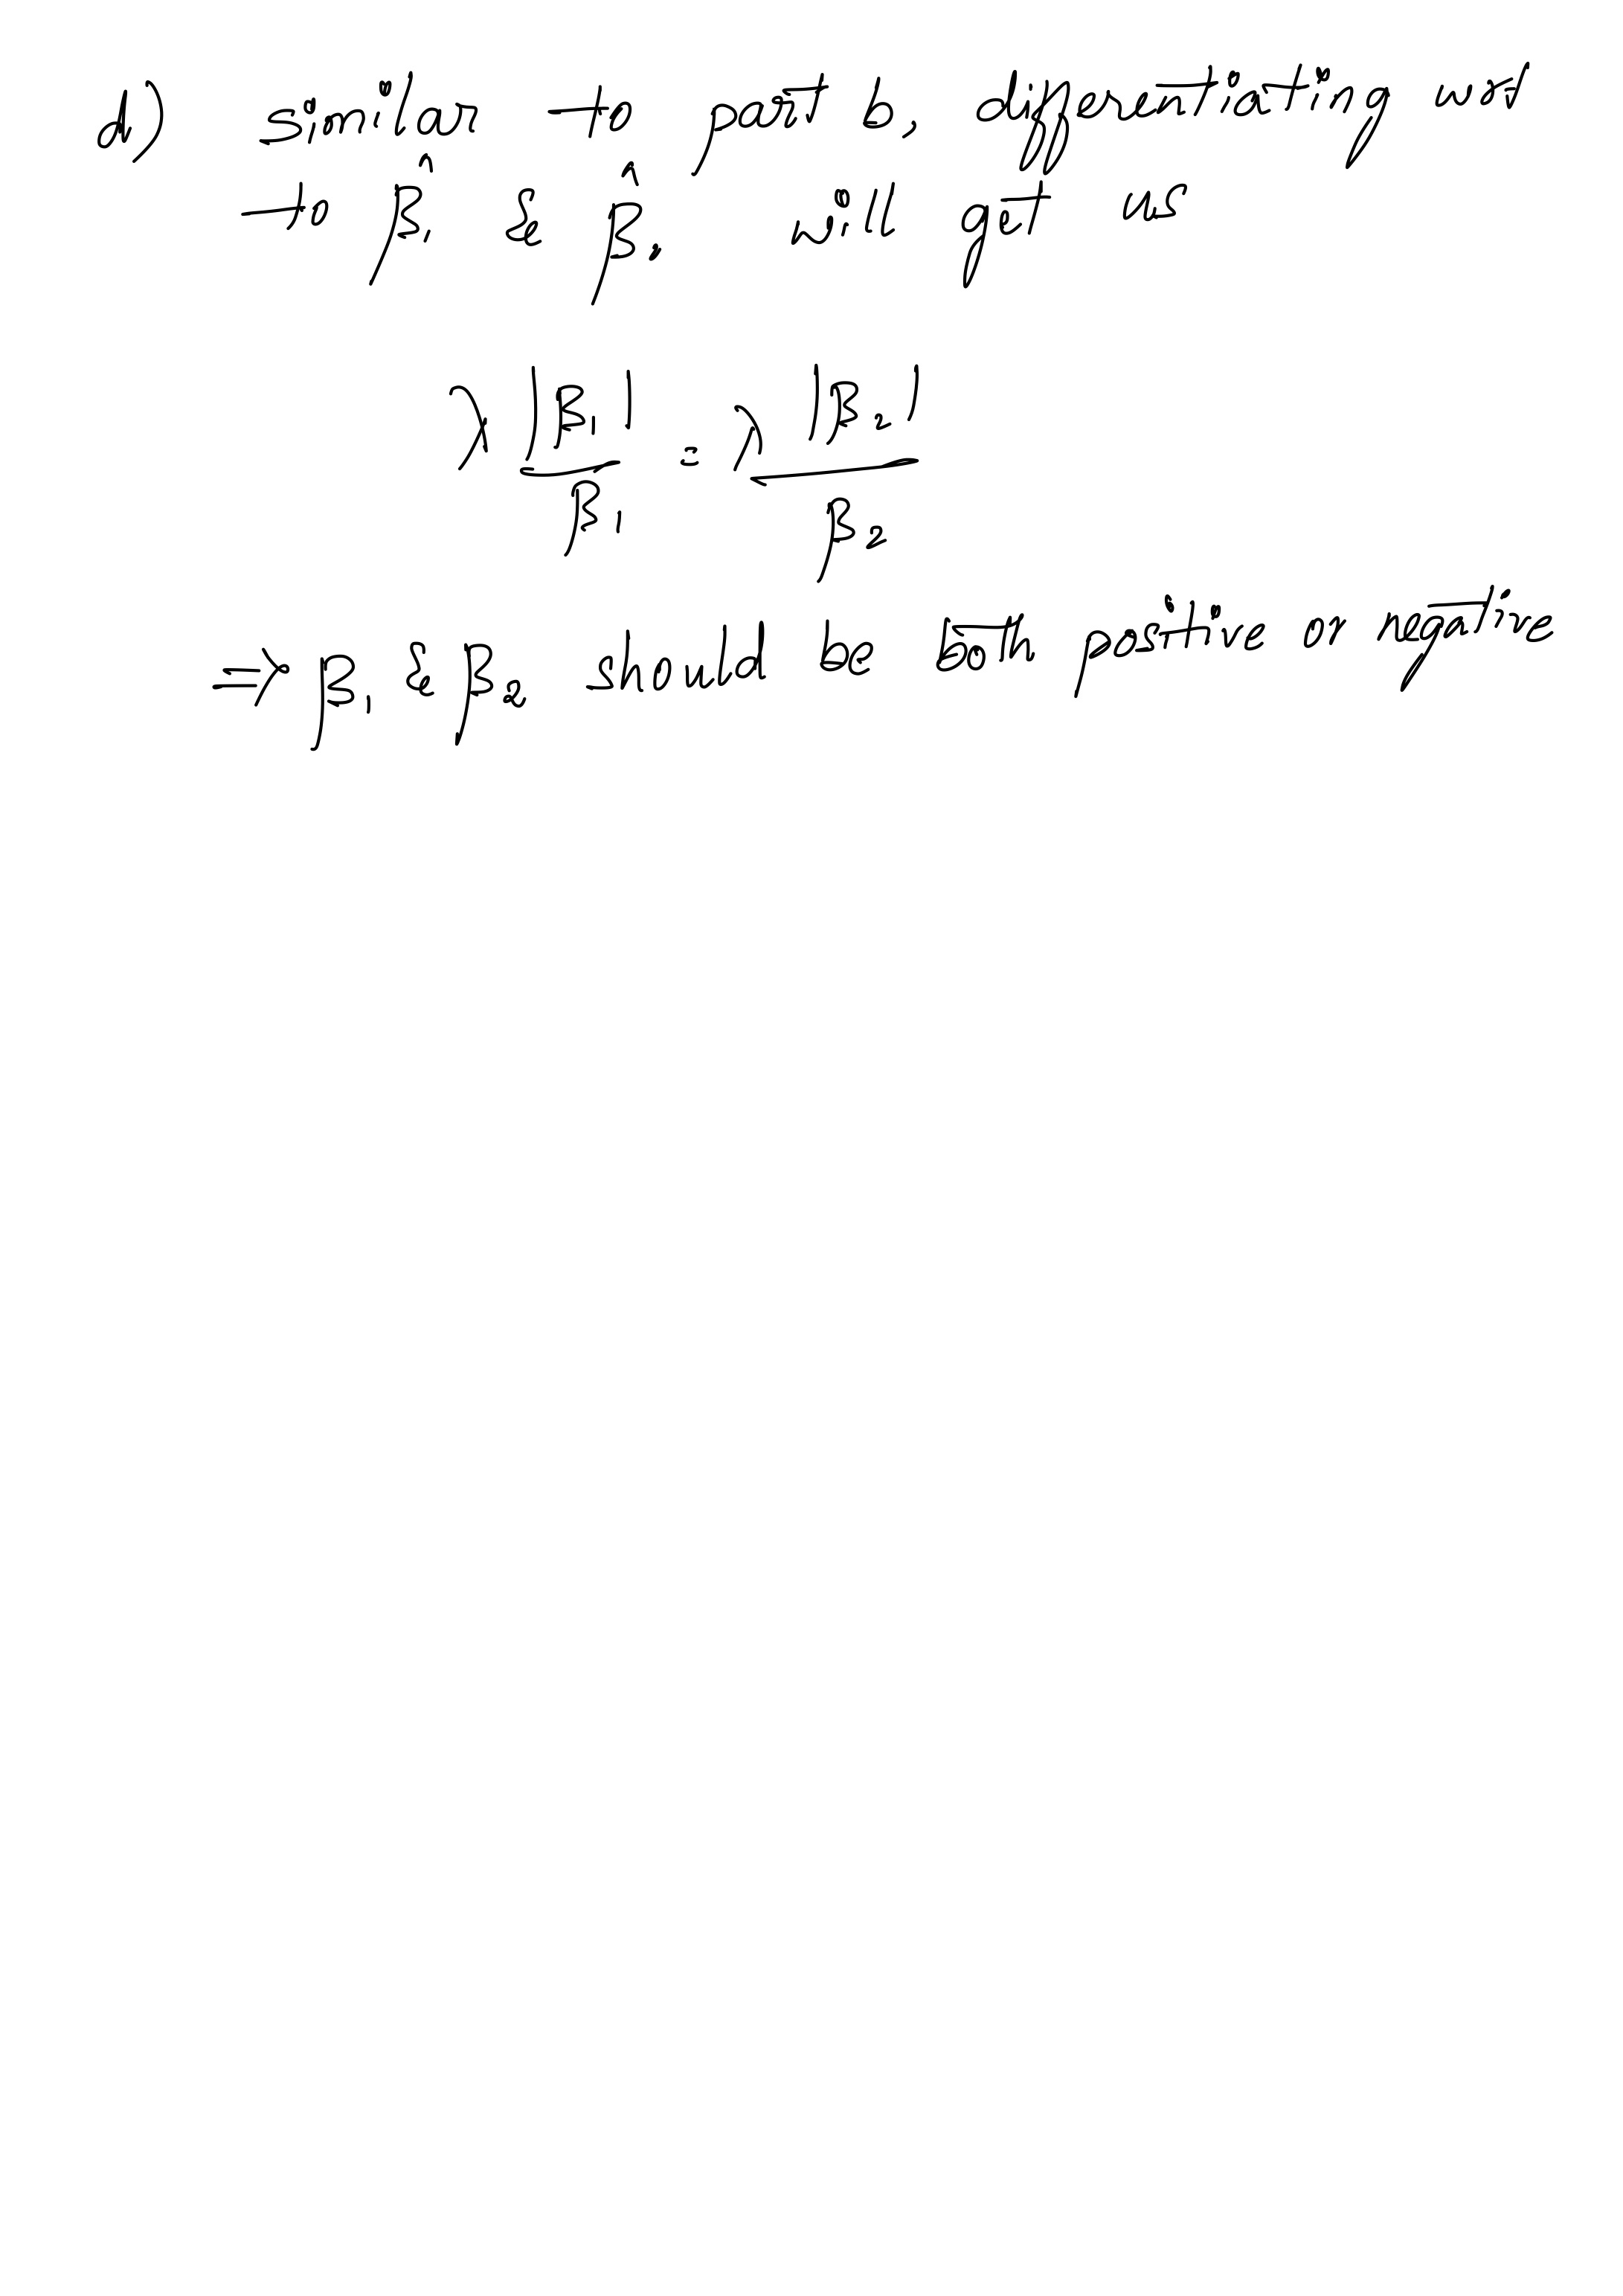

In [34]:
Image(filename='../ISLR685_3.jpg',width=800, height=400)

# 5. ISLR 8.4.5
## 5. Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X):
## 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.
## There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

Majority vote approach assigns the value to the class that occurs most number of times. Counting the values that are less than cut-off value 0.5, we get 4 and 6 that are greater than it. So X would be classified as Red.


The average of given obs is $(0.1 + 01.5 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75) / 10$ that is 0.45. As it is less than the cut-off value, X would not be classified to Red.

# 6. ISLR 9.7.3

## Here we explore the maximal margin classifier on a toy data set.
### (a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label.
| Obs. | X1 | X2 | Y
| :--- | :- | :- | :-
| 1 | 3 | 4 | Red
| 2 | 2 | 2 | Red
| 3 | 4 | 4 | Red
| 4 | 1 | 4 | Red
| 5 | 2 | 1 | Blue
| 6 | 4 | 3 | Blue
| 7 | 4 | 1 | Blue

### Sketch the observations.

<AxesSubplot:xlabel='X1', ylabel='X2'>

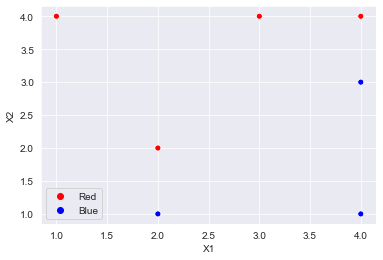

In [35]:
datap = pd.DataFrame({'Obs': [1, 2, 3, 4, 5, 6, 7], 'X1': [3, 2, 4, 1, 2, 4, 4], 'X2': [4, 2, 4, 4, 1, 3, 1], 
                     'Y': ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']})
sns.set_style("darkgrid")
sns.scatterplot(data= datap, x='X1', y='X2', hue=datap.Y.tolist(), palette=['red', 'blue'] )

### (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane

<AxesSubplot:xlabel='X1', ylabel='X2'>

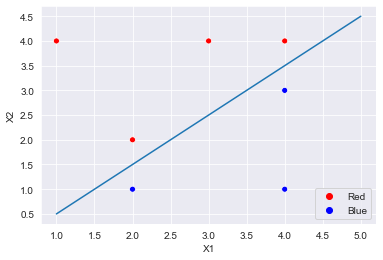

In [36]:
sns.scatterplot(data= datap, x='X1', y='X2', hue=datap.Y.tolist(), palette=['red', 'blue'] )
sns.lineplot(x=[1,1.5, 2,4,5], y=[0.5, 1, 1.5, 3.5, 4.5])

Maximum margin hyperplane must pass through the midpoint of red's (2,2) and blue's (2,1) ~ (2, 1.5). Extending the similar logic, it also passes through ~ (4, 3.5). That gives us hyperplane with following equation,
$X1 - X2 = 0.5$

### (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.

- The equation for maximal margin classifier would be this, Classify to Blue if $X1 - X2 - 0.5 > 0$, else classify to Red.

### (d) On your sketch, indicate the margin for the maximal margin hyperplane.

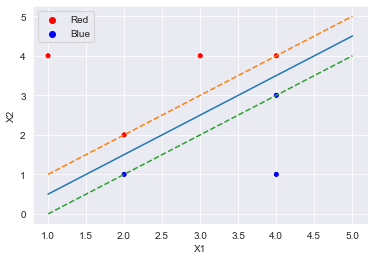

In [37]:
sns.scatterplot(data= datap, x='X1', y='X2', hue=datap.Y.tolist(), palette=['red', 'blue'] )
sns.lineplot(x=[1,1.5, 2,4,5], y=[0.5, 1, 1.5, 3.5, 4.5])
ax1 = sns.lineplot(x=[1,1.5, 2,4,5], y=[1,1.5, 2,4,5])
ax2 = sns.lineplot(x=[1,1.5, 2,4,5], y=[0, 0.5, 1, 3, 4])
ax1.lines[1].set_linestyle("--")
ax2.lines[2].set_linestyle("--")

### (e) Indicate the support vectors for the maximal margin classifier.
- The support vectors are (2,1), (2,2), (4,3) and (4,4).

### (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

- Seventh observation is (4,1) which is not a support vector. So moving it would not affect the maximal margin hyperplane.

### (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

<AxesSubplot:xlabel='X1', ylabel='X2'>

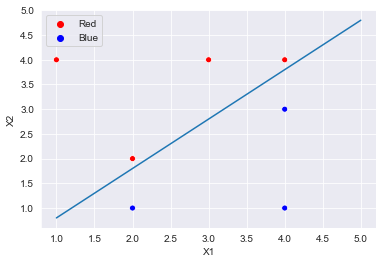

In [38]:
sns.scatterplot(data= datap, x='X1', y='X2', hue=datap.Y.tolist(), palette=['red', 'blue'] )
sns.lineplot(x=[1,1.5, 2,4,5], y=[0.8, 1.3, 1.8, 3.8, 4.8])

The equation for this hyperplane is $X1 - X2 = 0.2$.

### (h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

- Say we add a point that is red on blue side or blue point on red side, the classses would no longer be seperated by a hyperplane in these dimensions. So adding an additional observation of (2.5, 3) as blue would do the trick.

<AxesSubplot:xlabel='X1', ylabel='X2'>

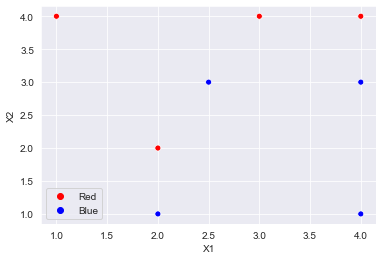

In [39]:
datap = datap.append({'Obs': 8, 'X1': 2.5, 'X2': 3, 
                     'Y': 'Blue'}, ignore_index=True)
sns.scatterplot(data= datap, x='X1', y='X2', hue=datap.Y.tolist(), palette=['red', 'blue'] )
